# Crashing Asteroids

ModSim Project 3

Kristtiya Guerra, HK Rho

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import random
import decimal

In [2]:
#should we add inertia to velocity or replace velocity with inertia???

In [3]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [4]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m
v_init = 5.16195792e46 * m / s

init = State(x = r_0,
             y = 0 *m,
             vx = 0 *m/s,
             vy = v_init)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,5.16195792e+46 meter / second


In [5]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e9 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1000000000.0 second


In [6]:
def universal_gravitation(state, system):
    """Computes gravitational force.
    """
    x, y, vx, vy = state
    unpack(system)
    
    #why can't we just calculate the gravitational force using the r vector?
    forceMag = G * m1 * m2 / (x**2 + y**2)
    #negative because it is positive outwards (distance increases as I go out)
    direction = Vector(-x, -y)
    gravity = forceMag * direction.hat()
    
    return gravity



def slope_func(state, t, system):
    """Compute derivatives of the state.
    """
    x, y, vx, vy = state
    unpack(system)    
    
    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = force[0] / m2
    dvydt = force[1] / m2
    
    #unpacking vectors bc ode solvers cannot handle vectors
    return dxdt, dydt, dvxdt, dvydt



# stops the simulation before the collision

def event_func(state, t, system):
    x,y,vx,vy = state
    r = Vector(x,y)
    
    return r.mag - system.r_final

In [7]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,362
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [8]:
t_final = get_last_label(results) * s

<Quantity(1000000000.0, 'second')>

In [9]:
t_final.to(UNITS.day)

<Quantity(11574.074074074071, 'day')>

In [10]:
ts = linspace(t_0, t_final, 500);

In [11]:
results.index /= 60 * 60 * 24

In [12]:
x = results.x / 1e9;
y = results.y / 1e9;

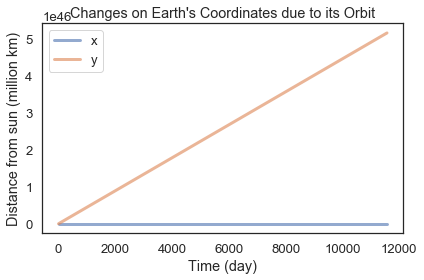

In [13]:
plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)',
         title="Changes on Earth's Coordinates due to its Orbit")

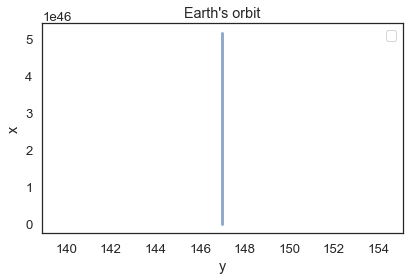

In [14]:
plot(x,y)
decorate(xlabel='y',
         ylabel='x',
         title="Earth's orbit")